# The Rise of Recommendation Systems

With the increasing trend of leveraging data analytics to identify and predict trends, data compilation and 
exploration has opened many doors in this new era of information.  Data science improves an organization’s decisions 
and Recommendation Systems are tools designed to aid data scientists succeed in it. Recommendation Systems are a 
subclass of information filtering systems that are able to forecast the rating or preference of a series of items for 
an individual and thus, improves the quality of search results for said end-user by presenting results more relevant 
to their search history. Major tech companies such as YouTube, Amazon, Spotify, and Hulu utilize Recommendation 
Systems in some form or fashion to essentially improve the effectiveness of their recommendation tools. With the 
recent widespread of the COVID-19, individuals find themselves spending more time at home and thus more time online, thus recommender systems have a more prevalent place in our lives now more than ever.

In this report we’ll be analyzing two movie datasets with metadata on approximately 5,000 movies from The Movie Database (TMDb) to build a baseline movie recommendation system. The first dataset is titled tmdb_5000_credits.csv and includes the following columns:

* movie_id – A unique identifier assigned to each movie in the dataset.
* cast – The name of leading or supporting actors and actresses in the movie.
* crew – The name of the Director, Editor, Composer, Author, etc.




The second dataset is titled tmdb_5000_movies.csv and contains the following columns:

* budget - The budget in which the movie was made measured in US dollars.
* genre - The genre of the movie (i.e. Action, Comedy, Thriller, etc).
* homepage - A link to the homepage of the movie.
* id - This is the same unique identifier as the one assigned in first dataset titled 'movie_id'.
* keywords - The keywords or tags related to the movie.
* original_language - The language or native tongue in which the movie was made.
* original_title - The title of the movie before translation or adaptation, if applicable.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity cumulatively measured by number of star ratings. 
* production_companies - The production house of the movie.
* production_countries - The country in which the movie was produced.
* release_date - The date on which the movie was released.
* revenue - The worldwide revenue generated by the movie measured in US dollars.
* runtime - The running time of the movie measured in minutes.
* status - "Released" or "Rumored".
* tagline - The movie's tagline.
* title - The title of the movie.
* vote_average - The average ratings of the movie received.
* vote_count - The counted number of votes received.

In [38]:
# import all libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
%matplotlib inline

df1=pd.read_csv("/Users/Rachel/Desktop/data/tmdb_5000_credits.csv")
df2=pd.read_csv("/Users/Rachel/Desktop/data/tmdb_5000_movies.csv")

Additionally, in order to streamline the analysis, I merged the two datasets using the ‘id’ column as the column level name to join on.

In [14]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

To further my familiarity and understanding the data, I assessed each column's statistics using the **describe()** function. Some prominent findings are:

* Popularity ranges from 0 - 875, however the mean is 21 therefore the max value of popularity could potentially be an outlier.

* Number of votes had a range of 0 - 13,752. This tells users of the data that some movies in the data frame received more votes than others, which could possibly have an affect the fairness in popularity ratings.

* The average rating of the movie (**vote_average**) was approximately 6. This signifies the mean rating measured or based on votes for most movies in the dataset.

In [15]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


The initial approach to type of Recommendation System built out from manipulating the data will be a more generalized resolution, using genre and popularity (**vote_count** and **vote_average**) to understand the basic mechanics behind the metric score of a movie and applying it to the dataset so as to recommend the highest rated movies for users with similar demographics. Since IMDB’s weighted rating formula considers the number of votes casted for each movie title, the minimum number of votes necessary to be featured on the list, and the overall mean vote for the whole list, I followed the IMDB scoring algorithm rather than using the **vote_average** as the score.

IMDB’s weighted rating formula is as follows: 

weighted rating (WR) = (v / (v + m)) x R + (m / (v + m)) x C)

* R = The average rating, aka mean, the movie received (**vote_average**)
* v = The number of votes counted for the movie (**vote_count**)
* m = The minimum votes necessary to be featured on the list
* C = The calculated overall mean vote for the whole list

Since **vote_average** (R) reports the average rating per movie and **vote_count** (v) provides number of votes for the movie, the overall mean vote across the dataset (C) can be calculated using the **mean()** function. We are able to conclude the mean vote across the entire list is approximately 6 on a scale of 10.

In [16]:
C = df2['vote_average'].mean()
C

6.092171559442011

The final variable needed for the weighted rating formula is an appropriate valuation for the minimum votes necessary to be included in the final list (m). For this calculation I used the 85th percentile as the cutoff to determine a suitable value, meaning in order for the movie to be featured in the list it will need to have more votes than at least 85% of the movies in the list. From this calculation, we are able to conclude in order or the minimum number of votes required to be featured is approximately 1,300 votes.

In [17]:
m = df2['vote_count'].quantile(0.85)
m

1300.6999999999998

Consequently, with this new-found information I made a copy of the joined datasets to filter out the movies with more than or equal to 1,300 votes using **.loc()** to extract these rows. NumPy array’s shape attribute tells me there are 721 movies that meet these criteria; therefore, I can determine the score for each of these qualified films using the defined **weighted_rating()** function. Determining the value of newly defined feature, **score**, is done by applying **weighted_rating(**) function to the 721 movies that qualify. Now each qualified movie in the data frame has a calculated score that can be used to recommend a film conditional IMDB’s weighted rating method.

In [18]:
r_movies = df2.copy().loc[df2['vote_count'] >= m]
r_movies.shape

(721, 23)

In [19]:
def weighted_rating(x, m = m, C = C):
    R = x['vote_average']
    v = x['vote_count']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
r_movies['score'] = round(r_movies.apply(weighted_rating, axis=1), 2)

In order to view the top 20 movies, I sorted the data frame from smallest to largest conditional the score feature and printed its **title**, **vote_average**, and **score** so as to compare the variation between the two. Additionally, the **vote_count** is included for reference.

In [21]:
r_movies = r_movies.sort_values('score', ascending = False)
r_movies[['title', 'vote_count', 'vote_average', 'score']].head(20)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.17
662,Fight Club,9413,8.3,8.03
3232,Pulp Fiction,8428,8.3,8.00
65,The Dark Knight,12002,8.2,7.99
3337,The Godfather,5893,8.4,7.98
96,Inception,13752,8.1,7.93
809,Forrest Gump,7927,8.2,7.90
95,Interstellar,10867,8.1,7.89
1990,The Empire Strikes Back,5879,8.2,7.82
329,The Lord of the Rings: The Return of the King,8064,8.1,7.82


Under the metric **score** rating, I can visually display the top 15 movie titles by bar graph to showcase the 15 most highly rated films by IMDB’s standards. This graph also displays that none of the top 15 movies have a score that fall below 7.5, demonstrating that in order to be highly rated film by IMDB's standards it must receive a score of approximately 7.5 or higher.

Text(0.5, 1.0, 'Top 15 Movies')

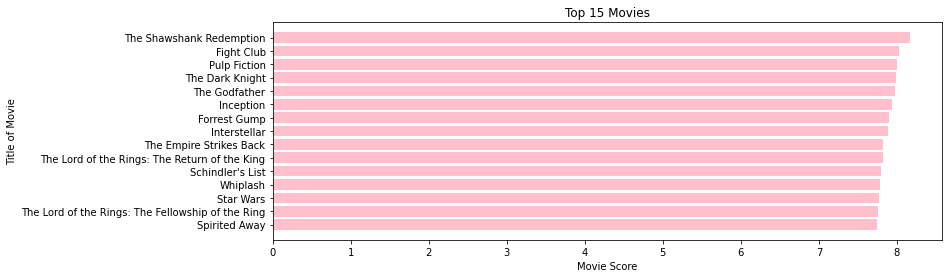

In [26]:
plt.figure(figsize=(12,4))

plt.barh(r_movies['title'].head(15),r_movies['score'].head(15), align='center',
        color='pink')
plt.gca().invert_yaxis()
plt.xlabel("Movie Score")
plt.ylabel("Title of Movie")
plt.title("Top 15 Movies")

By plotting a histogram of the score, one can interpret the data visualization of the score distribution on an interval scale. The normality of its distribution leads me to conclude there are no unusual observations or gaps in the score and its bell-shaped distribution reveals the median, confirming that the majority of movies in this list are approximately rated 6.5. I can double check this statistic with the **.describe()** function. Therefore, when recommending a movie to audiences of a similar demographic, the Recommendation System can leverage this scoring metric to recommend titles that lie above the second quartile and perhaps the third quartile in order to ensure the recommendation is scored highly among 50% - 75% of its viewers.

Text(0, 0.5, 'Frequency of Score')

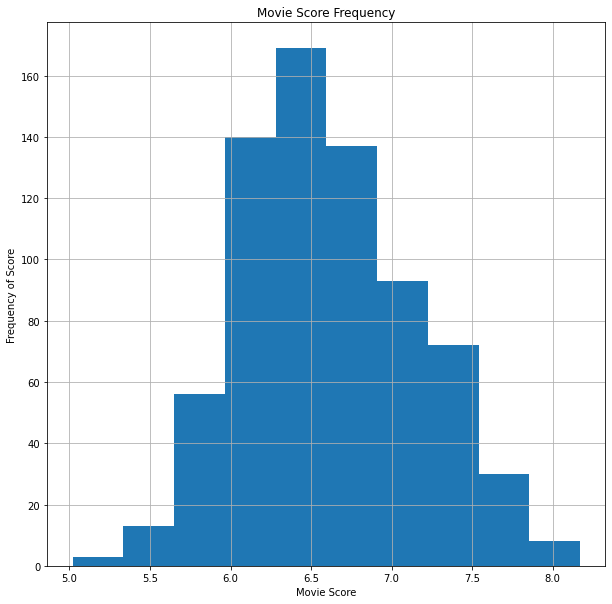

In [23]:
r_movies['score'].hist(figsize=(10,10))
plt.title('Movie Score Frequency')
plt.xlabel('Movie Score')
plt.ylabel('Frequency of Score')

In [186]:
# Generate descriptive statistics to double check histogram
r_movies['score'].describe()

count    721.000000
mean       6.585298
std        0.626946
min        5.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        8.000000
Name: score, dtype: float64

After creating and establishing a baseline recommendation system, one can compare it to sorting the data by popularity, a cumulative value measured by number of star ratings awarded (range of 0 – 5 stars). The ‘Top 15 Movies’ determined by score ranks completely different movies as the leading titles as the ‘Popular Movies’ bar graph, however this is because the ‘Popular Movies’ graph is consequent of a Trending Now system. Under the Trending Now tab of said systems one can find films that are very popular (but with no cutoff votes/ star ratings necessary to qualify) and they can just be obtained by sorting the dataset by the **popularity** column.

Text(0.5, 1.0, 'Popular Movies')

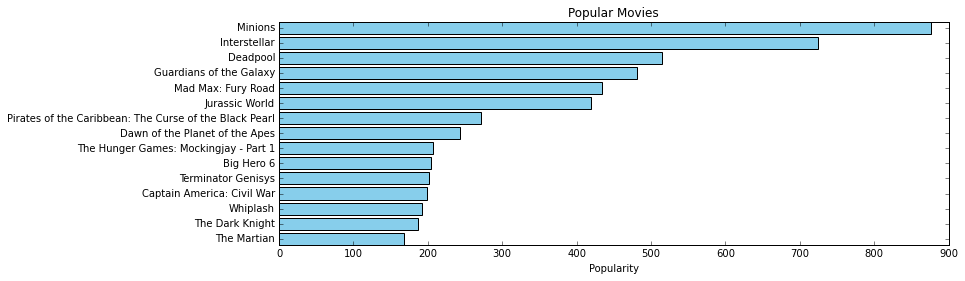

In [161]:
pop = df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(15),pop['popularity'].head(15), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

That being said, in order to effectively analyze the statistics and create visualizations with meaningful relationships, I viewed all columns with numerical data with both a histogram and scatterplot. At first glance, runtime and score have an even, positive relationship as well as revenue and budget.

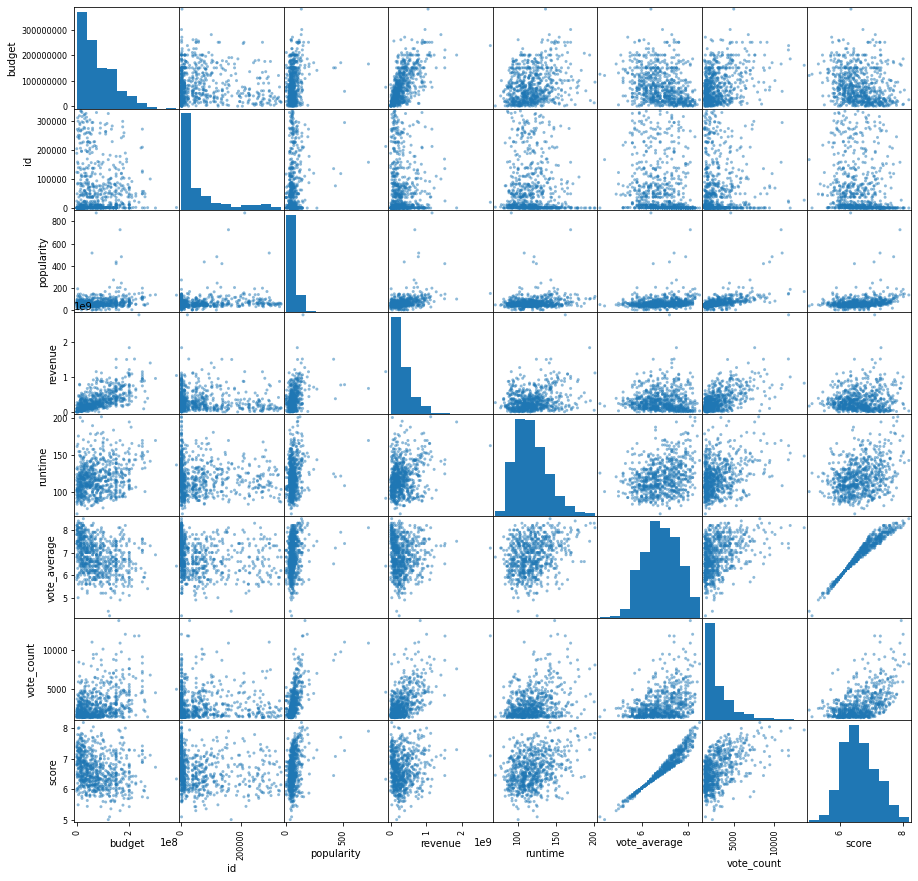

In [24]:
pd.plotting.scatter_matrix(r_movies, figsize=(15, 15));

As for runtime, a film with a duration of approximately of 100 – 120 minutes is most strongly preferred among movie viewers. This hypothesis can be supported by referencing the **.describe()** function.

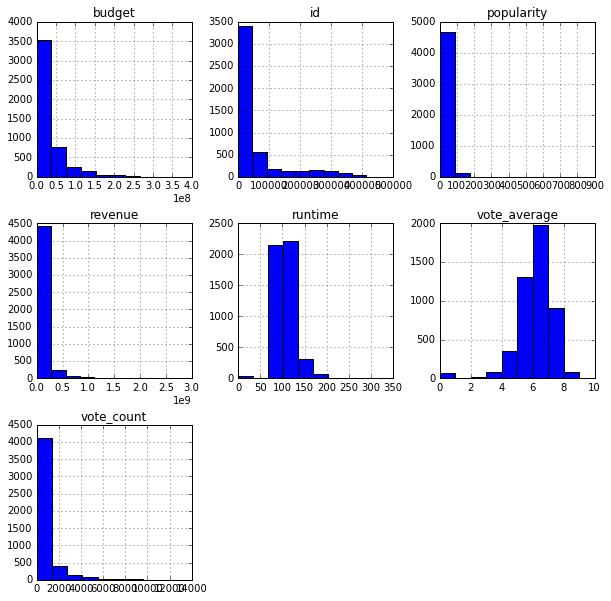

In [162]:
df2.hist(figsize=(10,10));

In [27]:
df2['runtime'].describe()

count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

Next, I utilized a pie graph to visually compare the varying distributions between the frequency of a movie’s score and popularity rating. The pie graph demonstrates the differing frequencies in movie score, emphasizing the importance in Recommendation System type when forecasting an individual’s movie rating or preference. Score encompasses the number of votes received by film whereas popularity is a cumulative star rating measure.

<AxesSubplot:title={'center':"Frequency of a Movie's Score"}, ylabel='score'>

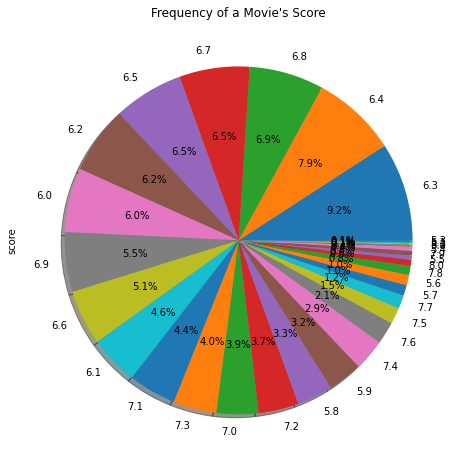

In [34]:
# rounded the the score for even or relative sizes of data with popularity 
r_movies['score'] = round(r_movies.apply(weighted_rating, axis=1), 1)

# Pie Chart - Movie's Score
r_movies['score'].value_counts().plot(kind='pie', figsize=(8,8), title = "Frequency of a Movie's Score", autopct='%1.1f%%', shadow=True)

<AxesSubplot:title={'center':"Movie's Popularity Frequency"}, ylabel='vote_average'>

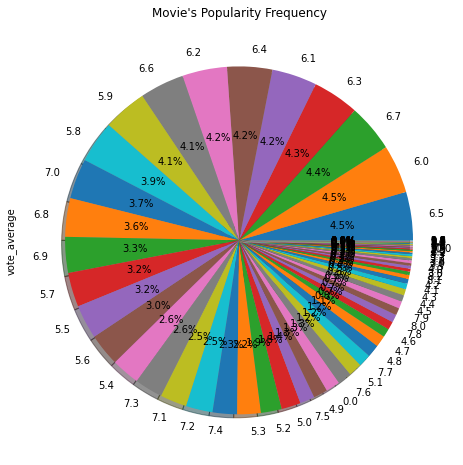

In [35]:
df2['vote_average'].value_counts().plot(kind='pie', figsize=(8,8), title = "Movie's Popularity Frequency", autopct='%1.1f%%', shadow=True)

So as to better understand score conditional revenue, I graphed a boxplot with score as the explanatory variable and revenue as the response variable. As expected, revenue distribution for a movie score of 5.0 was smaller than a movie score of 8.0. Another consideration to take into account when determining if score serves as a more fairly rated or universal metric compared to popularity is score’s  scalability advantage. The popularity column does not attain the same effectiveness of score when visually displaying its relationship with revenue using a boxplot because it’s range of values are much wider.

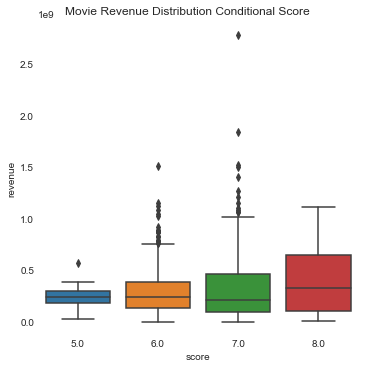

In [55]:
r_movies['score'] = round(r_movies.apply(weighted_rating, axis = 1), 0)

with sns.axes_style(style = 'ticks'):
    g = sns.catplot(x = "score", y = "revenue", data = r_movies, kind = "box")
    g.set_axis_labels("score", "revenue")
    g.fig.suptitle('Movie Revenue Distribution Conditional Score ');

The next relationship explored was between a film's score and runtime. As the line graph demonstrates below there is an approximate positive, linear relationship between the running time of a movie measured in minutes and its score. 

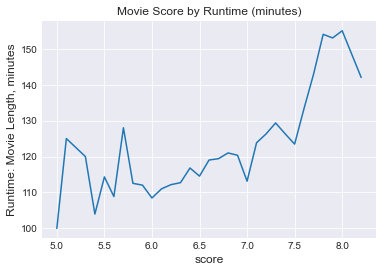

In [44]:
runtime = r_movies.groupby('score')['runtime'].mean()

plt.plot(runtime)
plt.title('Movie Score by Runtime (minutes)')
plt.xlabel('score', size=12)
plt.ylabel('Runtime: Movie Length, minutes', size=12)
plt.style.use('seaborn-darkgrid')

In [187]:
from pandas.io.json import json_normalize
import json

In [188]:
def json_decode(data,key):
    result = []
    data = json.loads(data) #convert to jsonjsonn from string
    for item in data: #convert to list from json
        result.append(item[key])
    return result

The last relationship explored was the **revenue** of a movie conditional the data subsets **popularity** and **score**. The basic regression model plots exhibit the various faceting options between the three variables. From the Scatter plot with regression lines below one can determine **score** and **revenue** have a positive, linear relationship. 

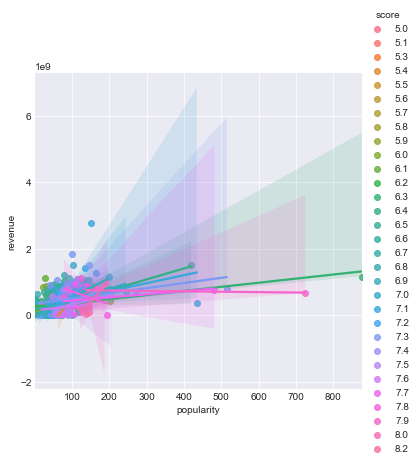

In [47]:
sns.lmplot(x="popularity", y="revenue",
           hue="score", 
           data=r_movies)

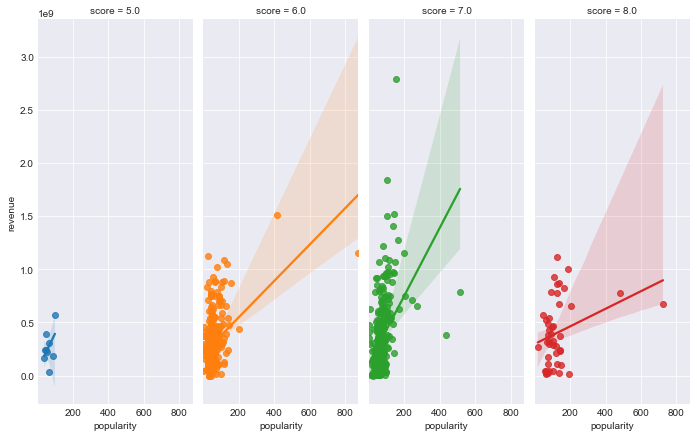

In [65]:
sns.lmplot(x = "popularity", y = "revenue", hue="score", col = "score", data = r_movies, height = 6, 
           aspect = .4, x_jitter = .1)

In conclusion, Recommender Systems are extremely critical in some industries. As the graphs above demonstrated, these systems can have an influential impact on income when they are efficient or additionally can serve as an effective competitive advantage. The streaming industry serves as one of these industries. Although the amount of available information increased, a new problem arose as people had a hard time selecting the items they actually want to see. Data science gives us the tools to analyze and better understand this new age of information to create more efficient systems to improve the quality of search results and  items so that they are more relevant to the user.  